# Project: United States Firearm Ownership Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This analysis will utilize data from the FBI's NICS (National Instant Criminal Background Check System) and the US Census data from 2010 to examine gun purchases from 2011 through 2016. We will explore the quantity/type of gun purchases by year to look for any trends. We will also see if there is any association between median household income and firearm purchases. Finally, we will examine State per capita gun ownership for the 48 contiguous States plus Alaska and Hawaii.

In [38]:
# Import required packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import geopandas as gpd
#from shapely.geometry import Point, Polygon
from IPython.display import FileLink, FileLinks

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [39]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_guns = pd.read_csv('gun_data.csv', index_col=False)
df_census = pd.read_csv('USCensusData.csv', index_col=False)
df_guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [40]:
df_guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


Check the *df_guns* dataset to identify which columns need to be removed, and where values are missing. Modifications will be made in the <a href="#cleaning">Data Cleaning</a></li> section below.

In [41]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

Check the *df_census* dataset to identify columns and null values that may need to be removed.

In [42]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Upon review of the above data in *df_census*, the dataset will need to be transposed so that the Census categories (features) become the columns, and the States become the rows. There apears to be missing values that require further investigation after the transpose has been performed.

In [43]:
# Info shows current state of the data after import. Additional inspection required after transpose.
df_census.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Fact Note       16 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

Upon manual inspection of the census data file, there were additional rows at the bottom that contained *informational notes* describing the data. Those rows were manually deleted from the file, but can be referenced in the following file: <a href="file:CensusDataNotes.txt">CensusDataNotes</a>

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

<a id='cleaning'></a>
### Data Cleaning (Replace this with more specific notes!)

### Cleaning of the *df_guns* dataset:

In [44]:
# Remove unwanted columns from the dataset
remove = ['permit','permit_recheck','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun',
          'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun','returned_other','rentals_handgun',
          'rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun',
          'return_to_seller_long_gun','return_to_seller_other']

df_guns.drop(remove, axis=1, inplace=True)
df_guns.head()

,month,state,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,5734.0,6320.0,221.0,317,32019
1,2017-09,Alaska,2320.0,2930.0,219.0,160,6303
2,2017-09,Arizona,11063.0,7946.0,920.0,631,28394
3,2017-09,Arkansas,4347.0,6063.0,165.0,366,17747
4,2017-09,California,37165.0,24581.0,2984.0,0,123506


Review for missing values.

In [45]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   other     5500 non-null   float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 682.9+ KB


Columns *handgun*, *long_gun* and *other* are missing values.

In [46]:
# Look for any NaN values
df_missing = df_guns[df_guns.isna().any(axis=1)]
df_missing

,month,state,handgun,long_gun,other,multiple,totals
5500,2009-05,Alabama,8829.0,7878.0,NaN,559,20277
5501,2009-05,Alaska,1941.0,2470.0,NaN,161,4878
5502,2009-05,Arizona,7009.0,5248.0,NaN,486,17837
5503,2009-05,Arkansas,4031.0,3860.0,NaN,237,13435
5504,2009-05,California,21720.0,19881.0,NaN,0,64304
...,...,...,...,...,...,...,...
12480,1998-11,Virginia,14.0,2.0,NaN,8,24
12481,1998-11,Washington,65.0,286.0,NaN,8,361
12482,1998-11,West Virginia,149.0,251.0,NaN,5,408
12483,1998-11,Wisconsin,25.0,214.0,NaN,2,241


Fill all Nan (null) values with zeros since that would be equivilant to a null value.

In [47]:
df_guns = df_guns.fillna(0)
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12485 non-null  float64
 3   long_gun  12485 non-null  float64
 4   other     12485 non-null  float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 682.9+ KB


Next step for the *df_guns* is to rollup individual months in years so we have annual gun purchases by State. The Month part of the date from the *month* column needs to be removed, leaving only the year portion. Rename the column to *year* and then convert to a numeric value. Sum the data as the final step.

In [48]:
# Overwrite the 'month' column with just the year portion of the date
df_guns['month'] = df_guns['month'].str[:4]

# Rename 'month' to 'year'
df_guns.rename(columns={'month':'year'}, inplace=True)

# Convert year to int
df_guns['year'] = pd.to_numeric(df_guns['year'])

# Total guns by year/state
df_total_guns_by_state = df_guns.groupby(['year','state'], as_index=False).sum()

# Total guns by year
df_total_guns = df_guns.groupby(['year'], as_index=False).sum()
df_total_guns.head()

,year,handgun,long_gun,other,multiple,totals
0,1998,219999.0,582791.0,0.0,8720,891898
1,1999,2536738.0,5217451.0,0.0,103743,9043747
2,2000,2191879.0,4779978.0,0.0,95777,8427096
3,2001,2167213.0,4943375.0,0.0,97132,8820045
4,2002,1845112.0,4409311.0,0.0,93069,8367069


Prepare the *df_annual_gun_purchases* will be to limit the dataset to the years 2011-2016 and divide each value by 1000K so they can be visualized nicely.

In [49]:
# Create df_annual_gun_purchases
df_annual_gun_purchases = df_total_guns.query('year >= 2011 & year <= 2016')
df_annual_gun_purchases.set_index('year', inplace=True)
df_annual_gun_purchases =  df_annual_gun_purchases.div(1000000)
df_annual_gun_purchases.reset_index(inplace=True)
df_annual_gun_purchases.head()

,year,handgun,long_gun,other,multiple,totals
0,2011,4.301389,5.445966,0.070137,0.219618,16.336732
1,2012,5.682963,6.866225,0.162823,0.230270,19.463832
2,2013,6.387502,7.128798,0.212776,0.241360,20.966704
3,2014,6.199243,5.543371,0.268263,0.225475,20.860241
4,2015,7.333808,5.479441,0.329499,0.242375,23.026288


### Cleaning of the *df_census* dataset:

In [50]:
# Census dataframe in it's original form for review
df_census.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


### Data in the *df_census* requires several modifications to make it usable for analysis:
- Rename the *Fact* column to *index*. This is temporary to ensure the real index column is not transposed.
- Transpose the columns (Rows become columns and columns become rows)
- Rename the desired colums that we will want to keep for the dataset
- Use the reset_index function to add a new index column to the dataframe
- Rename the original *index* column to *state*
- Drop the first row of data that used to be the *Fact Note* column
- Create final dataframe for analysis with desired columns

In [51]:
# Rename the 'Fact' column to 'index'
df_census.rename(columns={'Fact':'index'}, inplace=True)

# Transpose the dataframe using the 'index' column
df_census = df_census.set_index('index').transpose()

# Rename desired columns
df_census.rename(columns = {df_census.columns[0]:'est_pop_2016', 'Population, Census, April 1, 2010':'pop_2010', 'Median household income (in 2015 dollars), 2011-2015':'median_income'}, inplace=True)

# Reset the index on the dataframe which adds a new index column
df_census.reset_index(inplace=True)

# Rename the old 'index' columm to 'state' which is the data values it holds
df_census.rename(columns={'index':'state'}, inplace=True)

# Drop the first row of data that was the original 'Fact Note' column containing NaN values
df_census.drop([0], inplace=True)

# Assign desired columns to df_census
df_census = df_census[['state', 'est_pop_2016', 'pop_2010', 'median_income']]
df_census.head()

index,state,est_pop_2016,pop_2010,median_income
1,Alabama,"4,863,300","4,779,736","$43,623"
2,Alaska,"741,894","710,231","$72,515"
3,Arizona,"6,931,071","6,392,017","$50,255"
4,Arkansas,"2,988,248","2,915,918","$41,371"
5,California,"39,250,017","37,253,956","$61,818"


Verify that we have the desired columns in our updated dataset (above) and ensure we have all 50 States (below).

In [52]:
# Validate there there is data for 50 States
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          50 non-null     object
 1   est_pop_2016   50 non-null     object
 2   pop_2010       50 non-null     object
 3   median_income  50 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


Clean the data to remove special characters and convert to numeric values for *est_pop_2016*, *pop_2010* and *median_income* columns.

In [53]:
# Remove '$' and ',' from data fields
df_census['est_pop_2016'] = df_census['est_pop_2016'].str.replace('[$,]', '')
df_census['pop_2010'] = df_census['pop_2010'].str.replace('[$,]', '')
df_census['median_income'] = df_census['median_income'].str.replace('[$,]', '')

# Convert both population and income columns to numeric values
df_census['est_pop_2016'] = pd.to_numeric(df_census['est_pop_2016'])
df_census['pop_2010'] = pd.to_numeric(df_census['pop_2010'])
df_census['median_income'] = pd.to_numeric(df_census['median_income'])

# Validate that columns now contain numeric values
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          50 non-null     object
 1   est_pop_2016   50 non-null     int64 
 2   pop_2010       50 non-null     int64 
 3   median_income  50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


All States now have numeric values for analysis.

In [54]:
df_census.head()

index,state,est_pop_2016,pop_2010,median_income
1,Alabama,4863300,4779736,43623
2,Alaska,741894,710231,72515
3,Arizona,6931071,6392017,50255
4,Arkansas,2988248,2915918,41371
5,California,39250017,37253956,61818


Prepare the *df_guns_med_income* dataset using just 2016 data.

In [138]:
# Create initial dataset and then join census data
df_guns_2016 = df_total_guns_by_state.query('year == 2016')
df_guns_med_income = pd.merge(df_guns_2016, df_census, on='state')
df_guns_med_income['guns_per_med_income'] = df_guns_med_income['totals'] / df_guns_med_income['median_income']
df_guns_med_income['guns_per_capita'] = df_guns_med_income['totals'] / df_guns_med_income['est_pop_2016']
df_guns_med_income.head(10)

,year,state,handgun,long_gun,other,multiple,totals,est_pop_2016,pop_2010,median_income,guns_per_med_income,guns_per_capita,bin
0,2016,Alabama,153123.0,121963.0,6104.0,6545,616947,4863300,4779736,43623,14.142700,0.126858,40000-45000
1,2016,Alaska,37491.0,36887.0,2889.0,2316,87647,741894,710231,72515,1.208674,0.118140,70000-75000
2,2016,Arizona,166784.0,108988.0,13122.0,7908,416279,6931071,6392017,50255,8.283335,0.060060,50000-55000
3,2016,Arkansas,80244.0,82120.0,3059.0,4400,266014,2988248,2915918,41371,6.429963,0.089020,40000-45000
4,2016,California,560355.0,554550.0,211707.0,0,2377167,39250017,37253956,61818,38.454285,0.060565,60000-65000
5,2016,Colorado,242502.0,180026.0,15890.0,14293,540514,5540545,5029196,60629,8.915107,0.097556,60000-65000
6,2016,Connecticut,122375.0,43813.0,2445.0,0,317692,3576452,3574097,70331,4.517098,0.088829,70000-75000
7,2016,Delaware,25574.0,21746.0,1268.0,1034,59430,952065,897934,60509,0.982168,0.062422,60000-65000
8,2016,Florida,662308.0,316232.0,42439.0,25142,1435340,20612439,18801310,47507,30.213232,0.069635,45000-50000
9,2016,Georgia,194800.0,128277.0,6474.0,7478,612985,10310371,9687653,49620,12.353587,0.059453,45000-50000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
df_annual_gun_purchases

,year,state,handgun,long_gun,other,multiple,totals
715,2011,Alabama,0.130490,0.146290,0.002121,6262,0.336102
716,2011,Alaska,0.028291,0.034607,0.000955,1678,0.070198
717,2011,Arizona,0.108245,0.081285,0.003111,4700,0.251477
718,2011,Arkansas,0.054659,0.078806,0.000768,3672,0.206228
719,2011,California,0.303169,0.320988,0.000186,0,0.905701
...,...,...,...,...,...,...,...
1040,2016,Virginia,0.295963,0.209975,0.012547,0,0.528369
1041,2016,Washington,0.214106,0.151029,0.023732,8028,0.713996
1042,2016,West Virginia,0.092124,0.081105,0.003643,5283,0.242350
1043,2016,Wisconsin,0.186300,0.159784,0.009867,523,0.561819


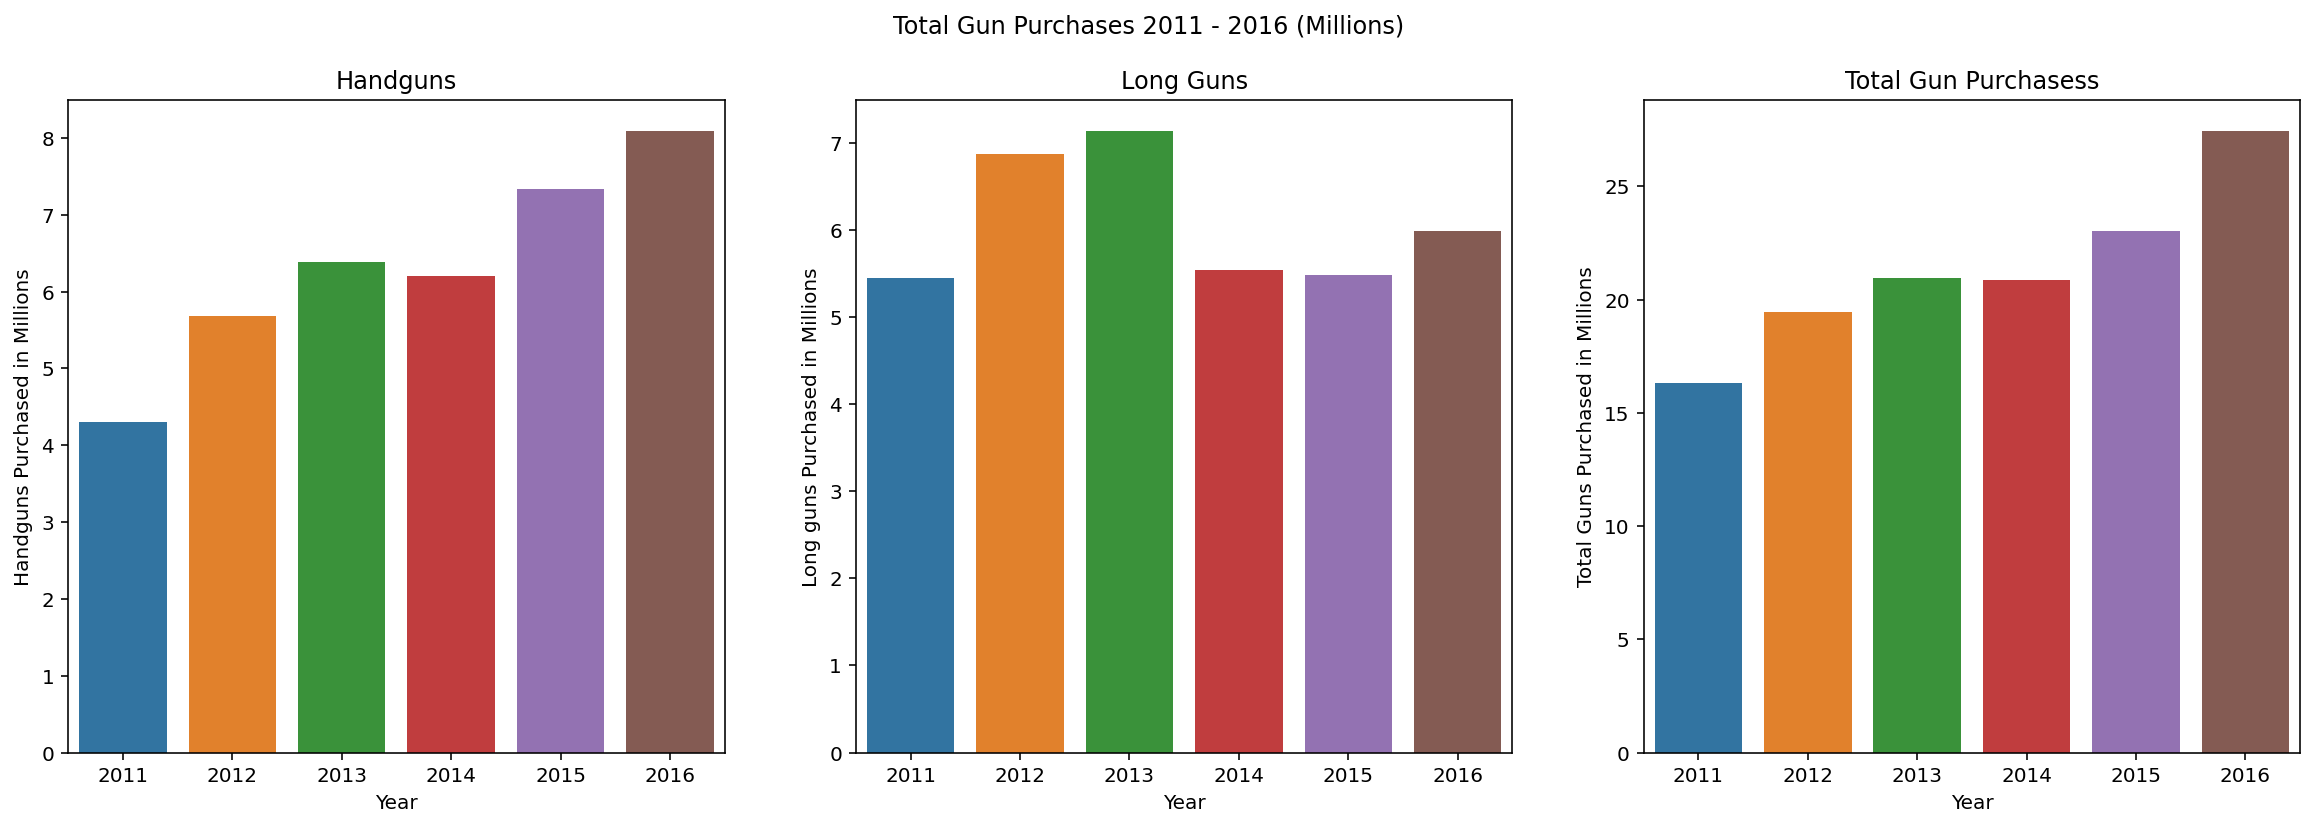

In [172]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

fig.suptitle('Total Gun Purchases 2011 - 2016 (Millions)')

sns.barplot(x='year', y='handgun', data=df_annual_gun_purchases, ax=axes[0], estimator=np.sum)
axes[0].set_title('Handguns')
axes[0].set(ylabel='Handguns Purchased in Millions', xlabel='Year')

sns.barplot(x='year', y='long_gun', data=df_annual_gun_purchases, ax=axes[1], estimator=np.sum)
axes[1].set_title('Long Guns')
axes[1].set(ylabel='Long guns Purchased in Millions', xlabel='Year')

sns.barplot(x='year', y='totals', data=df_annual_gun_purchases, ax=axes[2], estimator=np.sum)
axes[2].set_title('Total Gun Purchasess')
axes[2].set(ylabel='Total Guns Purchased in Millions', xlabel='Year')

plt.show()

# https://www.kaggle.com/code/sujan97/data-visualization-quick-guide/notebook
# https://www.statology.org/seaborn-title/

### Research Question 2  (Replace this header name!)

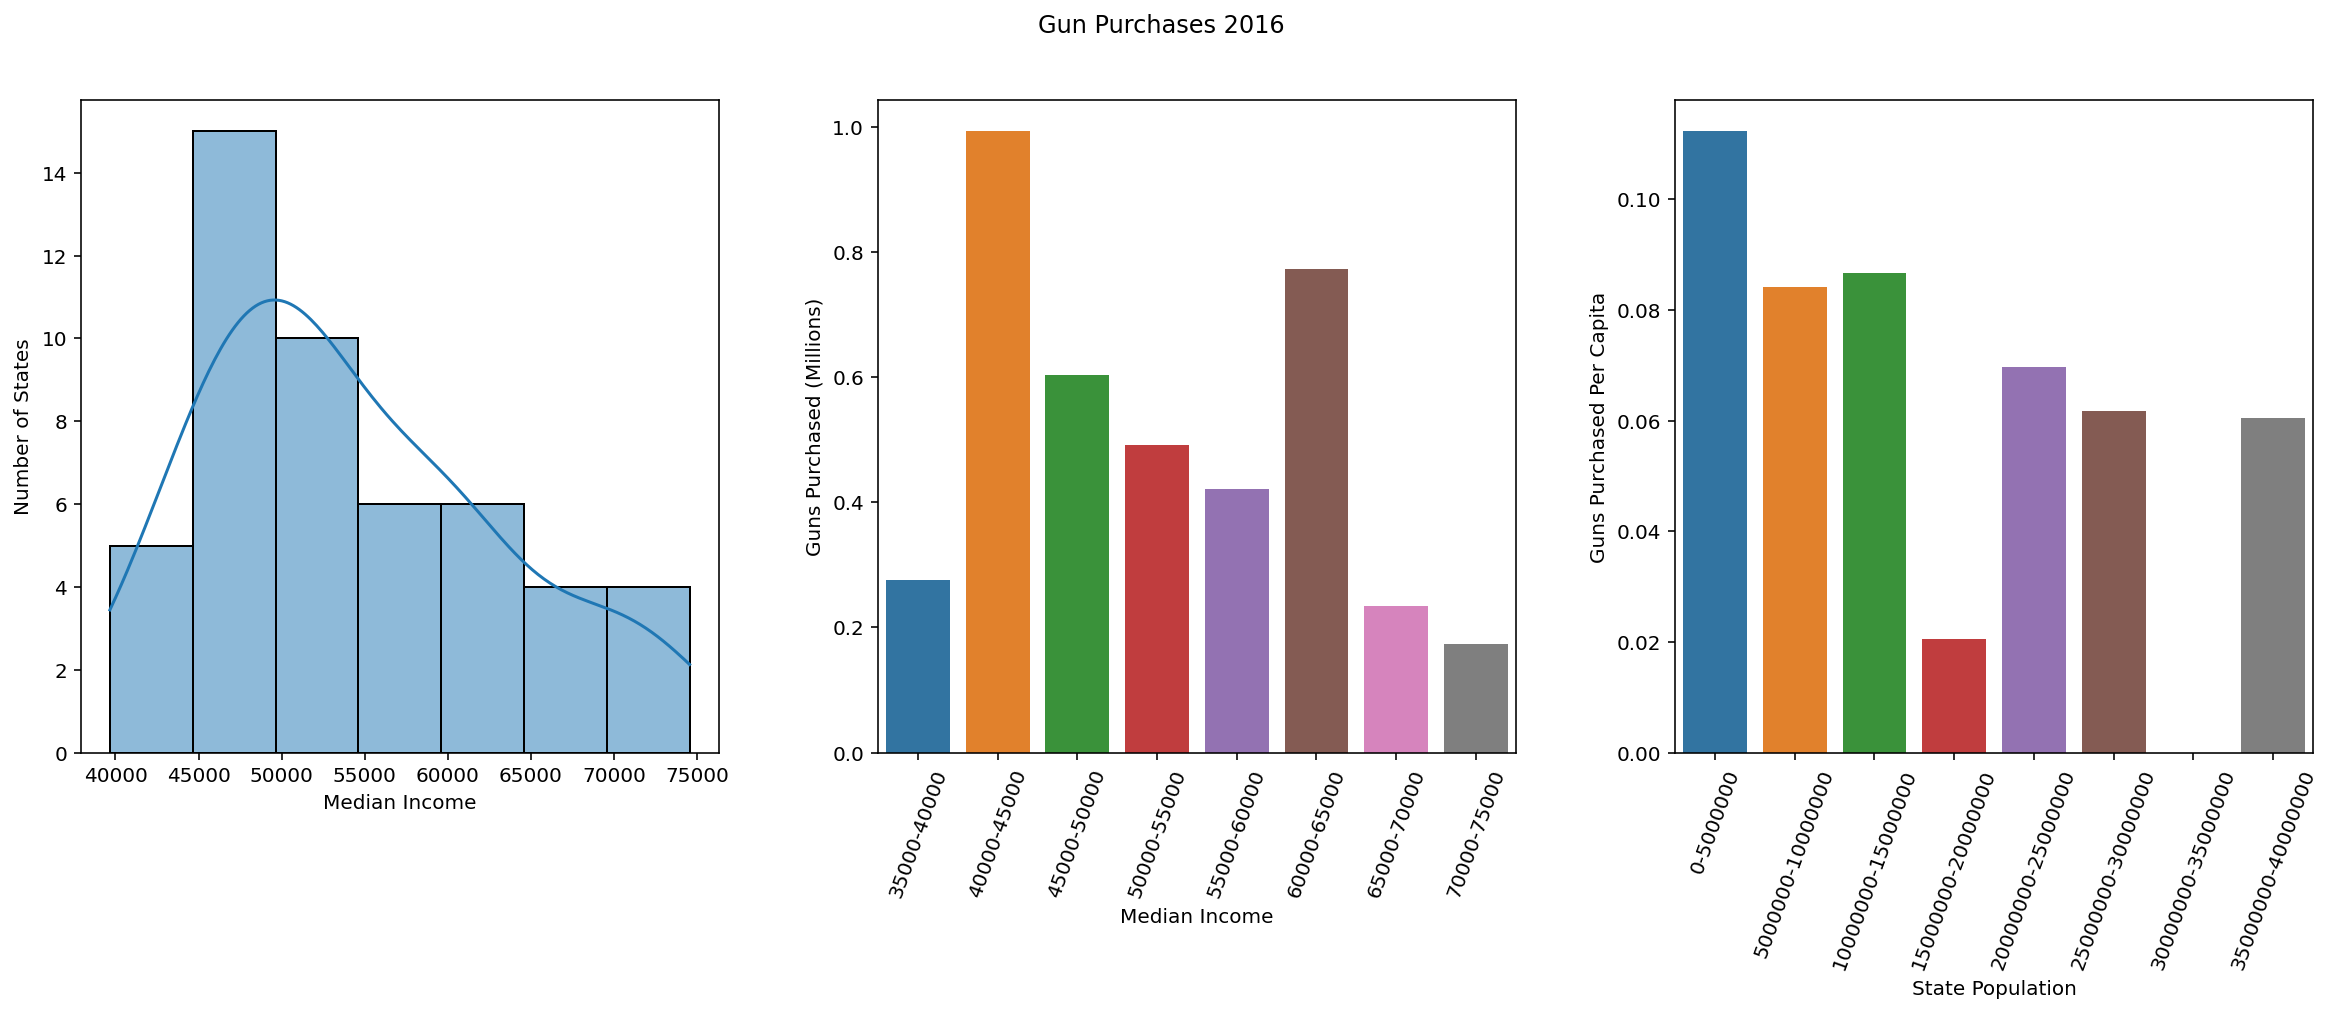

In [171]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_guns_med_income['bin_med'] = pd.cut(df_guns_med_income['median_income'], bins=range(35000,75001,5000), 
                                        labels=[f'{l}-{l+5000}' for l in range(35000,70001,5000)])
df_guns_med_income['bin_cap'] = pd.cut(df_guns_med_income['est_pop_2016'], bins=range(0,40000001,5000000), 
                                        labels=[f'{l}-{l+5000000}' for l in range(0,35000001,5000000)])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
fig.subplots_adjust(wspace=.25)
fig.suptitle('Gun Purchases 2016')

sns.histplot(data=df_guns_med_income, x='median_income', ax=axes[0], kde=True)
axes[0].set(ylabel='Number of States', xlabel='Median Income')

sns.barplot(data=df_guns_med_income, x='bin_med', y=df_guns_med_income['totals'].div(1000000), ax=axes[1], ci=None)
axes[1].tick_params('x', labelrotation=70)
axes[1].set(ylabel='Guns Purchased (Millions)', xlabel='Median Income')

sns.barplot(data=df_guns_med_income, x='bin_cap', y='guns_per_capita', ax=axes[2], ci=None)
axes[2].tick_params('x', labelrotation=70)
axes[2].set(ylabel='Guns Purchased Per Capita', xlabel='State Population')

plt.show()

# https://www.tutorialspoint.com/how-to-adjust-the-space-between-matplotlib-seaborn-subplots-for-multi-plot-layouts
# https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/
# https://stackoverflow.com/questions/62963174/make-bar-chart-with-binned-x-values-python

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!